In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # LogisticRegression Model from sklearn
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tit_datsset = pd.read_csv("Titanic-Dataset.csv")
tit_datsset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tit_datsset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
age_median = tit_datsset['Age'].median()
print("age median->", age_median)
tit_datsset['Age'].fillna(age_median, inplace= True)
wmbrked_mde = tit_datsset['Embarked'].mode()
print("Embarked Mode --> ",wmbrked_mde[0])
tit_datsset['Embarked'].fillna(wmbrked_mde[0], inplace= True)
tit_datsset.info()

age median-> 28.0
Embarked Mode -->  S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_23104\1148733826.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tit_datsset['Age'].fillna(age_median, inplace= True)
C:\Users\User\AppData\Local\Temp\ipykernel_23104\1148733826.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [6]:
map_gender_catg_num_val = {'male':0, 'female' : 1}
print(map_gender_catg_num_val)
print("map_gender_catg_num_val --> ",map_gender_catg_num_val)
tit_datsset['Sex'] = tit_datsset['Sex'].map(map_gender_catg_num_val)
map_embarked_catg_num_val = {'C':0, 'Q' : 1,'S':2}
print(map_embarked_catg_num_val)
print("map_embarked_catg_num_val --> ",map_embarked_catg_num_val)
tit_datsset['Embarked'] = tit_datsset['Embarked'].map(map_embarked_catg_num_val)
print(tit_datsset.head())

{'male': 0, 'female': 1}
map_gender_catg_num_val -->  {'male': 0, 'female': 1}
{'C': 0, 'Q': 1, 'S': 2}
map_embarked_catg_num_val -->  {'C': 0, 'Q': 1, 'S': 2}
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         2  
1          PC 17599  71.2833   C85        

In [7]:
tit_datsset.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
print(tit_datsset.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500         2
1            2         1       1    1  38.0      1      0  71.2833         0
2            3         1       3    1  26.0      0      0   7.9250         2
3            4         1       1    1  35.0      1      0  53.1000         2
4            5         0       3    0  35.0      0      0   8.0500         2


In [8]:
#Define features and predictions.
X = tit_datsset.drop('Survived' , axis=1)
y = tit_datsset['Survived']

In [9]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:
logistic_regress_mdl = LogisticRegression(max_iter=1000)
# Train model with Titanic data set
logistic_regress_mdl.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [11]:
#predict training data
y_train_prediction  = logistic_regress_mdl.predict(X_train)


In [ ]:
y_train_prediction

In [13]:
print(classification_report(y_train,y_train_prediction))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       381
           1       0.77      0.69      0.73       242

    accuracy                           0.80       623
   macro avg       0.80      0.78      0.79       623
weighted avg       0.80      0.80      0.80       623



In [15]:
cfm_mtrx_train = confusion_matrix(y_train,y_train_prediction)
cfm_mtrx_train

array([[332,  49],
       [ 74, 168]])

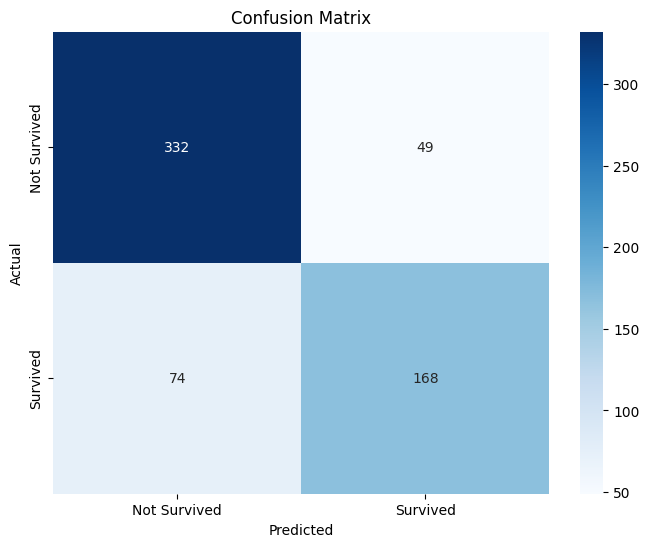

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(cfm_mtrx_train, annot=True, fmt='d',cmap='Blues', xticklabels=['Not Survived','Survived']
            , yticklabels=['Not Survived','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Predict with test data
y_test_prediction = logistic_regress_mdl.predict(X_test)
print(classification_report(y_test,y_test_prediction))
#confusion matrix
conf_mtrx_test = confusion_matrix(y_test,y_test_prediction)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       168
           1       0.73      0.72      0.72       100

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [ ]:
# plot confusion matrix with test data.
plt.figure(figsize=(8,6))
sns.heatmap(conf_mtrx_test, annot=True, fmt='d',cmap='Blues', xticklabels=['Not Survived','Survived']
            , yticklabels=['Not Survived','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()